In [22]:
import pandas as pd
import random
random.seed(42)

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/heart_disease.csv')

In [24]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<AxesSubplot:ylabel='Density'>

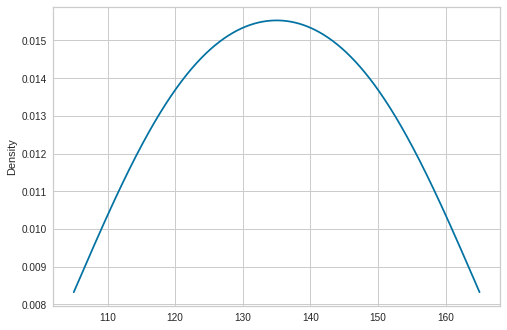

In [25]:
df.Disease.value_counts().plot(kind= "density")

In [26]:
df.shape

(270, 14)

In [27]:
import numpy as np
from pycaret.classification import *

In [28]:
clf = setup(data=df,target='Disease',fix_imbalance=False)

,Description,Value
0,session_id,1974
1,Target,Disease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(270, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8409,0.0000,0.7889,0.8520,0.8142,0.6759,0.6836,0.0210
lda,Linear Discriminant Analysis,0.8357,0.8955,0.7889,0.8437,0.8098,0.6660,0.6740,0.0190
lr,Logistic Regression,0.8251,0.8986,0.7903,0.8299,0.8029,0.6460,0.6548,0.9600
rf,Random Forest Classifier,0.7988,0.8824,0.7458,0.8241,0.7704,0.5936,0.6095,0.3080
nb,Naive Bayes,0.7936,0.8542,0.7681,0.7986,0.7731,0.5859,0.5989,0.0170
gbc,Gradient Boosting Classifier,0.7936,0.8311,0.7417,0.8122,0.7621,0.5800,0.5965,0.1300
et,Extra Trees Classifier,0.7924,0.8631,0.7208,0.8232,0.7570,0.5788,0.5950,0.2770
lightgbm,Light Gradient Boosting Machine,0.7830,0.8447,0.7097,0.8028,0.7451,0.5583,0.5700,0.2250
ada,Ada Boost Classifier,0.7459,0.8034,0.6694,0.7505,0.6927,0.4787,0.4933,0.1190
dt,Decision Tree Classifier,0.7082,0.7087,0.7083,0.6932,0.6891,0.4159,0.4317,0.0190


In [30]:
nb = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9222,0.7778,1.0000,0.8750,0.7865,0.8051
1,0.8947,0.9000,0.7778,1.0000,0.8750,0.7865,0.8051
2,0.7368,0.8222,0.5556,0.8333,0.6667,0.4633,0.4893
3,0.8421,0.9444,0.7778,0.8750,0.8235,0.6816,0.6854
4,0.6316,0.6667,0.6667,0.6000,0.6316,0.2652,0.2667
5,0.7895,0.8182,0.7500,0.7500,0.7500,0.5682,0.5682
6,0.6842,0.8182,0.7500,0.6000,0.6667,0.3736,0.3820
7,0.6842,0.7500,0.7500,0.6000,0.6667,0.3736,0.3820
8,0.8333,0.9125,1.0000,0.7273,0.8421,0.6747,0.7135


In [31]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.8556,0.6667,0.8571,0.7500,0.5730,0.5866
1,0.8421,0.8667,0.6667,1.0000,0.8000,0.6780,0.7161
2,0.8947,0.8889,0.7778,1.0000,0.8750,0.7865,0.8051
3,0.8947,0.9556,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.6842,0.8778,0.7778,0.6364,0.7000,0.3736,0.3820
5,0.7895,0.8750,0.7500,0.7500,0.7500,0.5682,0.5682
6,0.7895,0.8182,0.7500,0.7500,0.7500,0.5682,0.5682
7,0.7895,0.8864,0.7500,0.7500,0.7500,0.5682,0.5682
8,0.9444,1.0000,1.0000,0.8889,0.9412,0.8889,0.8944


In [32]:
lda = create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8667,0.7778,0.8750,0.8235,0.6816,0.6854
1,0.8421,0.8444,0.6667,1.0000,0.8000,0.6780,0.7161
2,0.8947,0.8889,0.7778,1.0000,0.8750,0.7865,0.8051
3,0.8947,0.9444,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.8421,0.8556,0.7778,0.8750,0.8235,0.6816,0.6854
5,0.7368,0.8523,0.6250,0.7143,0.6667,0.4509,0.4536
6,0.7895,0.8182,0.7500,0.7500,0.7500,0.5682,0.5682
7,0.7368,0.9091,0.7500,0.6667,0.7059,0.4693,0.4719
8,0.9444,1.0000,1.0000,0.8889,0.9412,0.8889,0.8944


In [33]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [34]:
best_model2 = compare_models([lda,nb,lr])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.8357,0.8955,0.7889,0.8437,0.8098,0.6660,0.6740,0.0180
2,Logistic Regression,0.8251,0.8986,0.7903,0.8299,0.8029,0.6460,0.6548,0.2610
1,Naive Bayes,0.7936,0.8542,0.7681,0.7986,0.7731,0.5859,0.5989,0.0260


In [41]:
tuned_lda = tune_model(lda) #tuning parameters 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8778,0.6667,1.0000,0.8000,0.6780,0.7161
1,0.8421,0.9222,0.6667,1.0000,0.8000,0.6780,0.7161
2,0.8947,0.8889,0.7778,1.0000,0.8750,0.7865,0.8051
3,0.8947,0.9444,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.7895,0.8667,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.7895,0.8636,0.7500,0.7500,0.7500,0.5682,0.5682
6,0.7895,0.8409,0.7500,0.7500,0.7500,0.5682,0.5682
7,0.7895,0.8864,0.7500,0.7500,0.7500,0.5682,0.5682
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


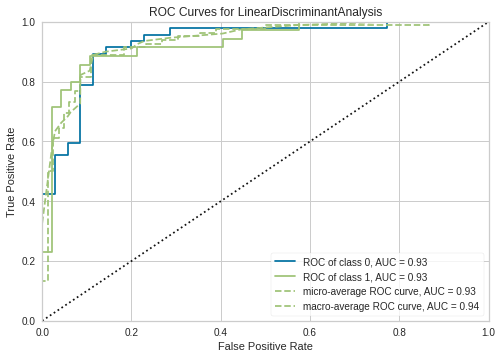

In [42]:
plot_model(tuned_lda)

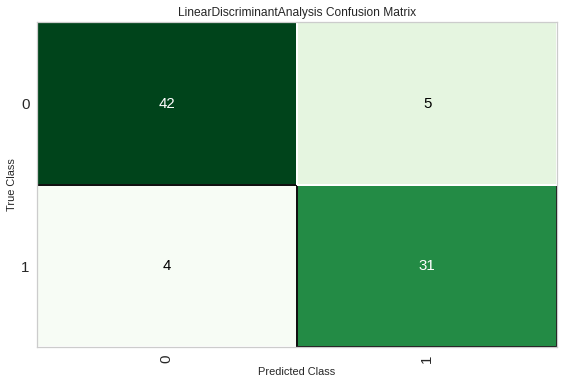

In [43]:
plot_model(tuned_lda,plot="confusion_matrix")

In [48]:
!pip install gradio

     |████████████████████████████████| 5.6 MB 70 kB/s eta 0:00:015
     |████████████████████████████████| 54 kB 135 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 200 kB/s eta 0:00:01
     |████████████████████████████████| 212 kB 264 kB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 542 kB/s eta 0:00:01
     |████████████████████████████████| 54 kB 620 kB/s eta 0:00:01
     |████████████████████████████████| 148 kB 777 kB/s eta 0:00:01
     |████████████████████████████████| 84 kB 567 kB/s eta 0:00:01
     |████████████████████████████████| 84 kB 571 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 86 kB/s eta 0:00:01
     |████████████████████████████████| 68 kB 30 kB/s eta 0:00:01
     |████████████████████████████████| 43 kB 184 kB/s eta 0:00:01:01
     |████████████████████████████████| 856 kB 415 kB/s eta 0:00:01
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=db4c6edacc6b5c643a03faff44d1b850ef4e7864e

In [49]:
create_app(tuned_lda)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f94156bdc70>, 'http://127.0.0.1:7860/', None)